<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/006_superstore_PROFIT_LOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import & Process Data

Dataset loaded successfully!
Missing Data:  0
Step 0: Removing outliers from column 'Sales'...

Column: Sales
Original Dataset: 9994 rows
Non-Outliers: 8827 rows (88.32%)
Outliers: 1167 rows (11.68%)


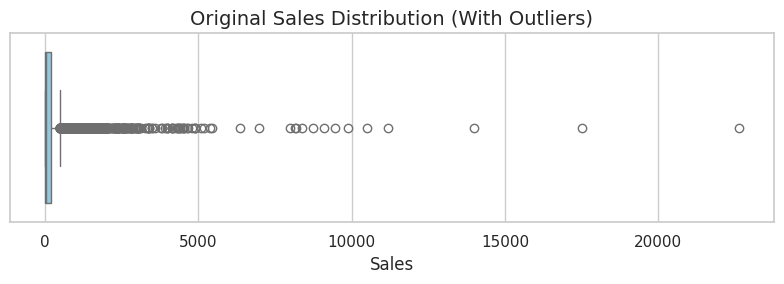

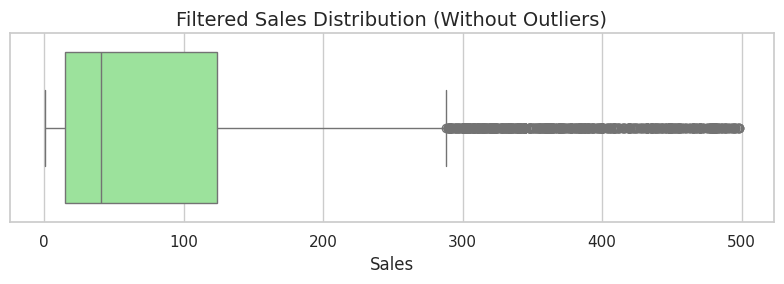

Outliers detected: 1167 rows sequestered for separate analysis.

Step 1: Preprocessing the data...
Step 2: Adding time-based columns...
Step 3: Converting to category and visualizing...



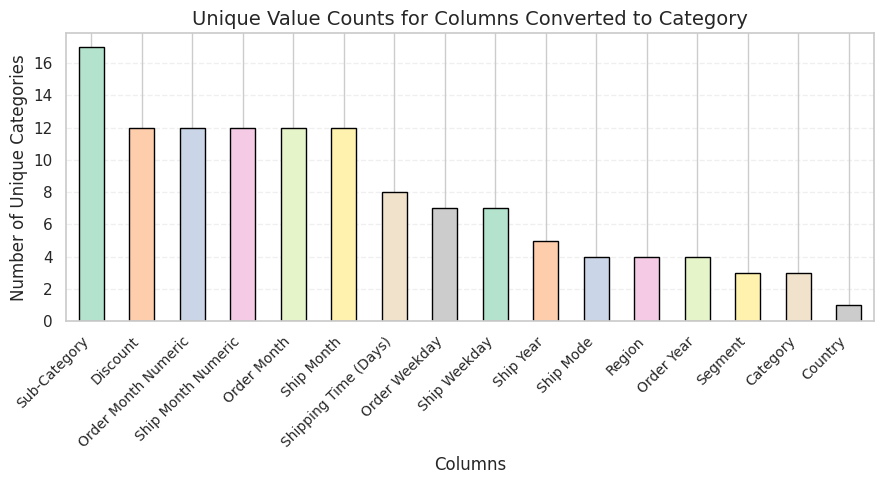


Step 4: Removing duplicates...
Removed 0 duplicate rows.
Step 5: Standardizing selected categorical columns...

Step 6: Ordering categorical columns...
Step 7: Adding abbreviated columns...
Data preparation completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8827 entries, 0 to 8826
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     8827 non-null   int64         
 1   Order ID                   8827 non-null   object        
 2   Order Date                 8827 non-null   datetime64[ns]
 3   Ship Date                  8827 non-null   datetime64[ns]
 4   Ship Mode                  8827 non-null   category      
 5   Customer ID                8827 non-null   object        
 6   Customer Name              8827 non-null   object        
 7   Segment                    8827 non-null   category      
 8   Country                    8827 non-nul

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the updated script
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu
importlib.reload(dpu)

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())

# Prepare the dataset
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.prepare_data(data, outlier_column='Sales', exclude_columns=exclude_columns)

# Final check
print(data.info())

## Overall Profit Distribution Visualizations

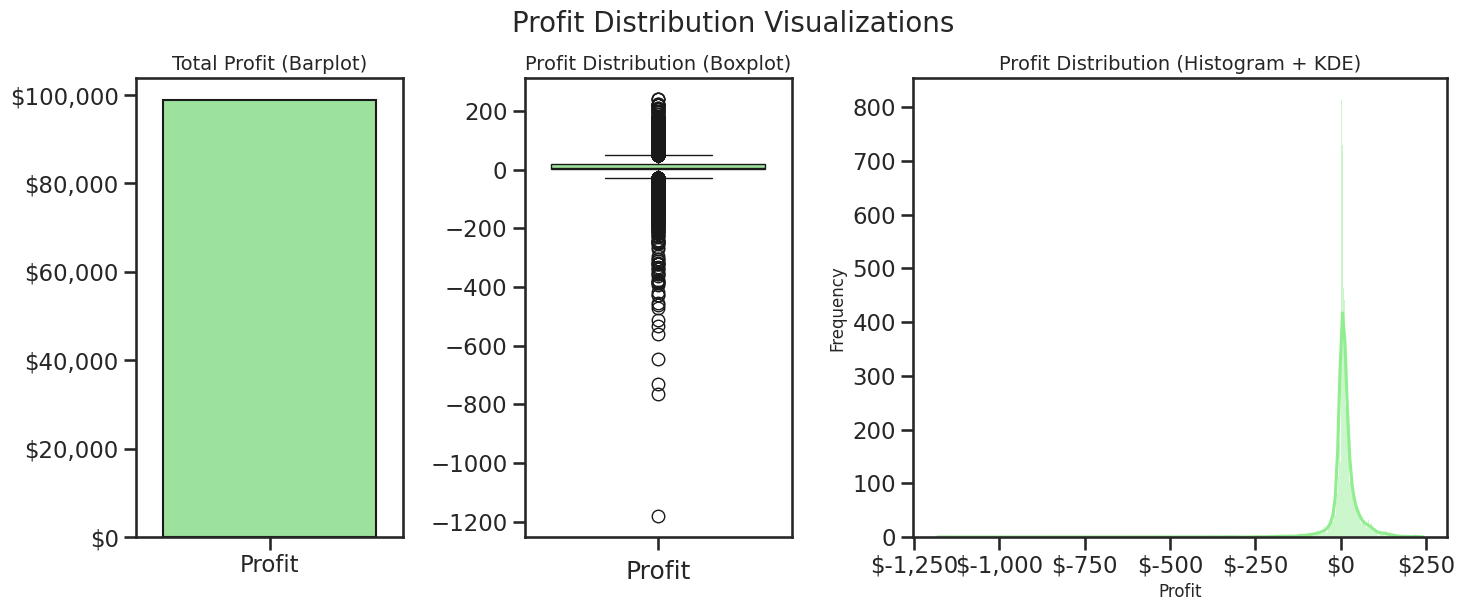

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
dvu.plot_sales_distribution(data, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

## Profit & Loss Visualization

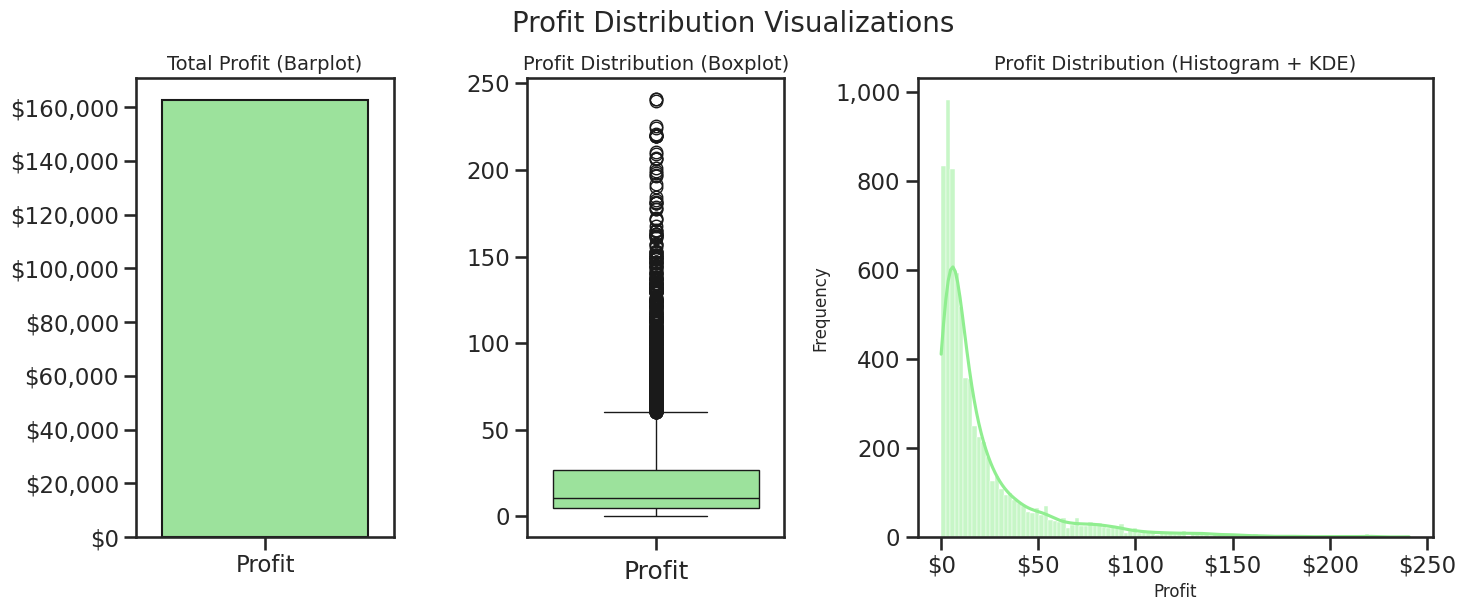

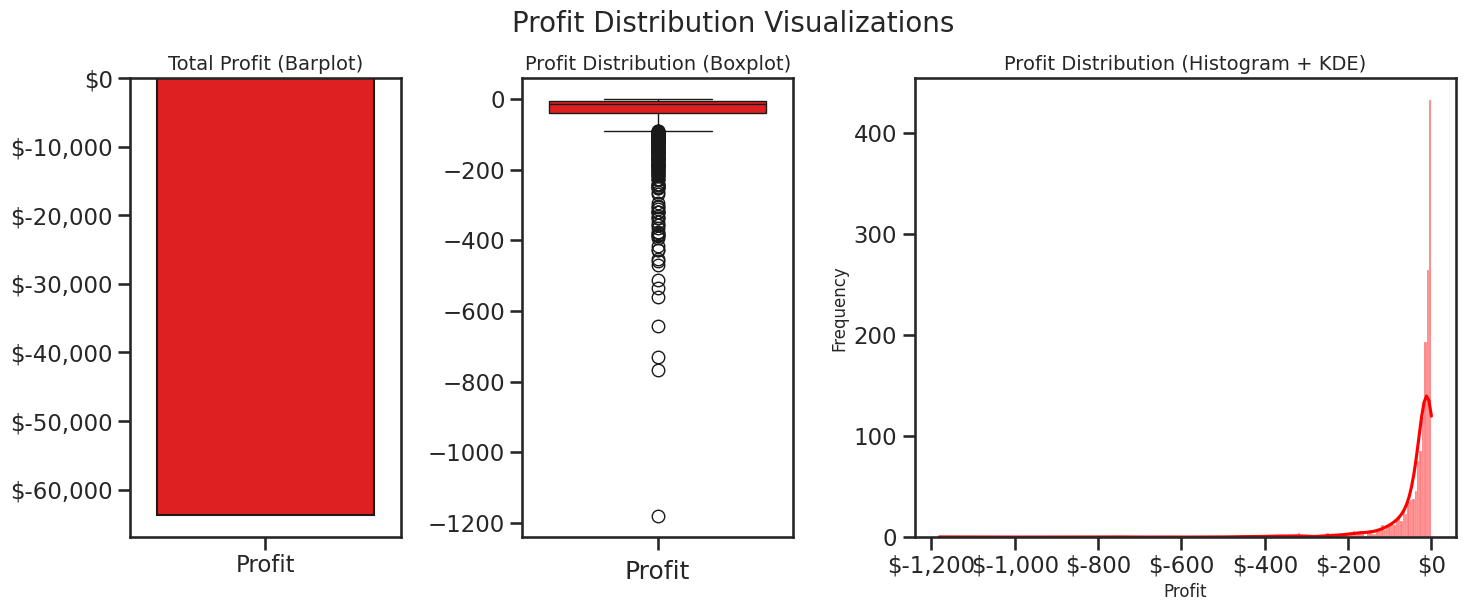

In [4]:
# Group 1: Data with losses (Profit < 0)
data_losses = data[data['Profit'] < 0]

# Group 2: Data with profits (Profit >= 0)
data_profits = data[data['Profit'] >= 0]

# plot the data
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

# plot the data
dvu.plot_sales_distribution(data_losses , column='Profit', title='Profit Distribution Visualizations', color='red')


##  Identify Key Contributors to Profits

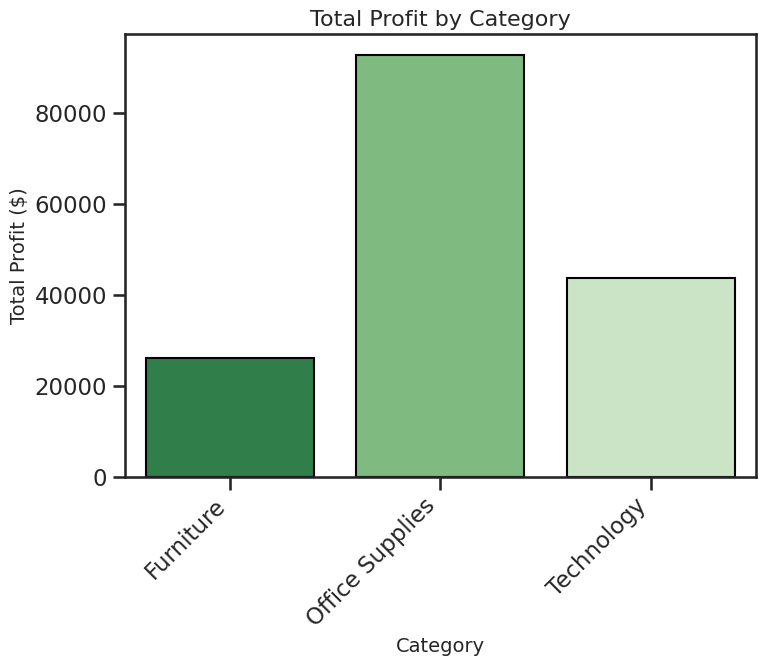

In [6]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Aggregate profits by category
profit_by_category = (
    data_profits.groupby("Category")["Profit"]
    .sum()
    .reset_index()
    .sort_values(by="Profit", ascending=False)
)

# Plot the total profit by category
plt.figure(figsize=(8,7))
sns.barplot(
    data=profit_by_category,
    x="Category",
    y="Profit",
    palette="Greens_r",  # Using a green palette for profit visualization
    edgecolor="black"
)
plt.title("Total Profit by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Profit ($)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


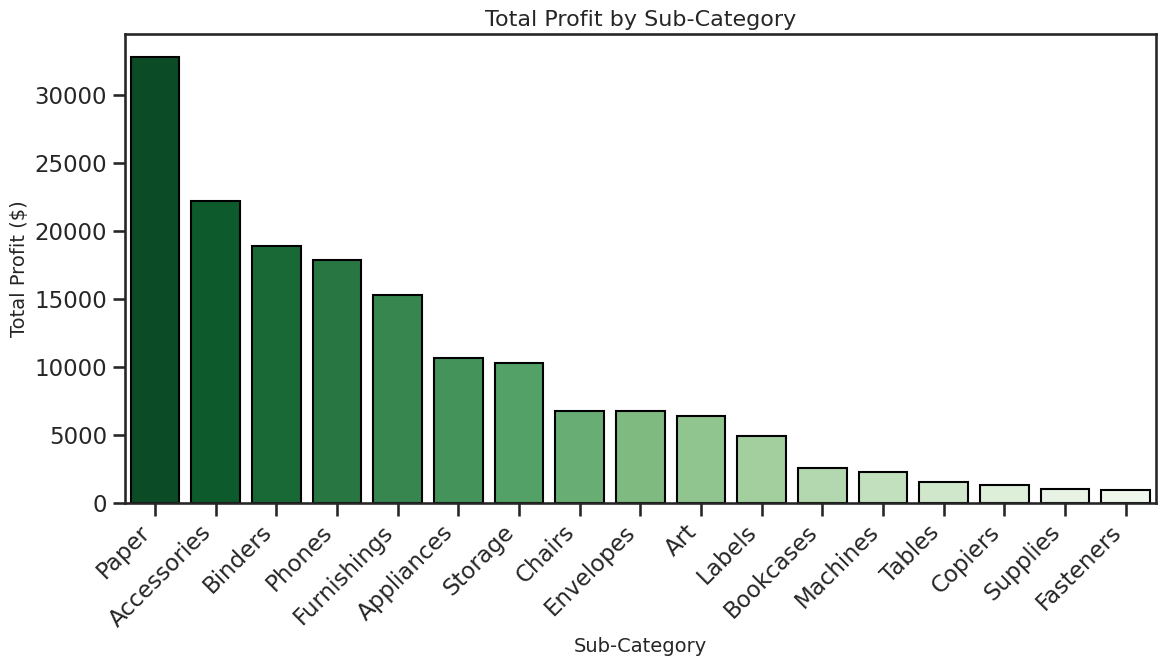

In [7]:
# Aggregate profits by sub-category
profit_by_subcategory = (
    data_profits.groupby("Sub-Category")["Profit"]
    .sum()
    .reset_index()
    .sort_values(by="Profit", ascending=False)
)

# Plot the total profit by sub-category
plt.figure(figsize=(12, 7))
sns.barplot(
    data=profit_by_subcategory,
    x="Sub-Category",
    y="Profit",
    palette="Greens_r",  # Green palette for profit visualization
    edgecolor="black",
    order=profit_by_subcategory["Sub-Category"]  # Explicitly order by sorted Profit
)
plt.title("Total Profit by Sub-Category", fontsize=16)
plt.xlabel("Sub-Category", fontsize=14)
plt.ylabel("Total Profit ($)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

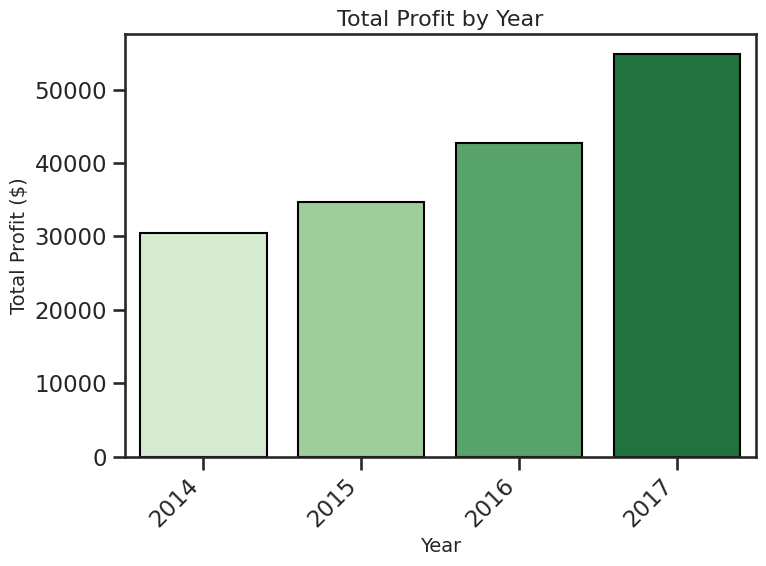

In [8]:
# Aggregate profits by year
profit_by_year = (
    data_profits.groupby("Order Year")["Profit"]
    .sum()
    .reset_index()
    .sort_values(by="Profit", ascending=True)
)

# Plot the total profit by year
plt.figure(figsize=(8,6))
sns.barplot(
    data=profit_by_year,
    x="Order Year",
    y="Profit",
    palette="Greens",  # Green palette for profit visualization
    edgecolor="black",
    order=profit_by_year["Order Year"]  # Explicitly order by sorted Profit
)
plt.title("Total Profit by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Profit ($)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


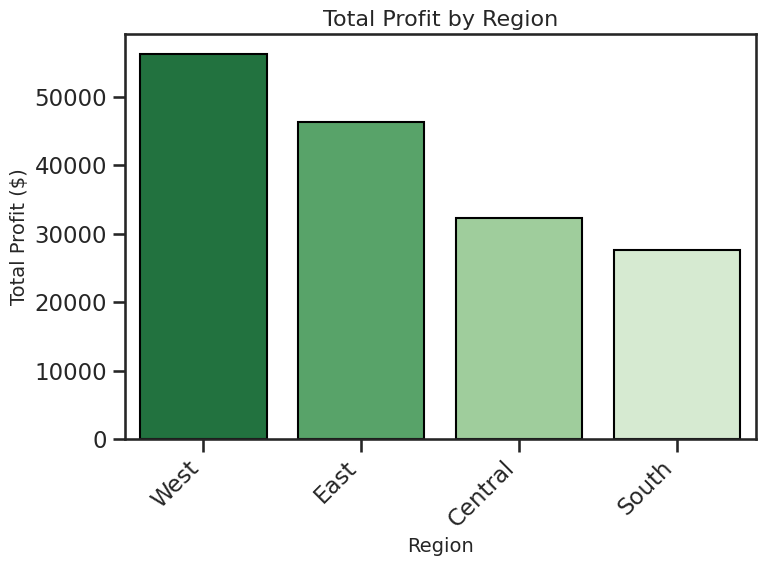

In [9]:
# Aggregate profits by region
profit_by_region = (
    data_profits.groupby("Region")["Profit"]
    .sum()
    .reset_index()
    .sort_values(by="Profit", ascending=False)
)

# Plot the total profit by region
plt.figure(figsize=(8,6))
sns.barplot(
    data=profit_by_region,
    x="Region",
    y="Profit",
    palette="Greens_r",  # Green palette for profit visualization
    edgecolor="black",
    order=profit_by_region["Region"]  # Explicitly order by sorted Profit
)
plt.title("Total Profit by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Profit ($)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


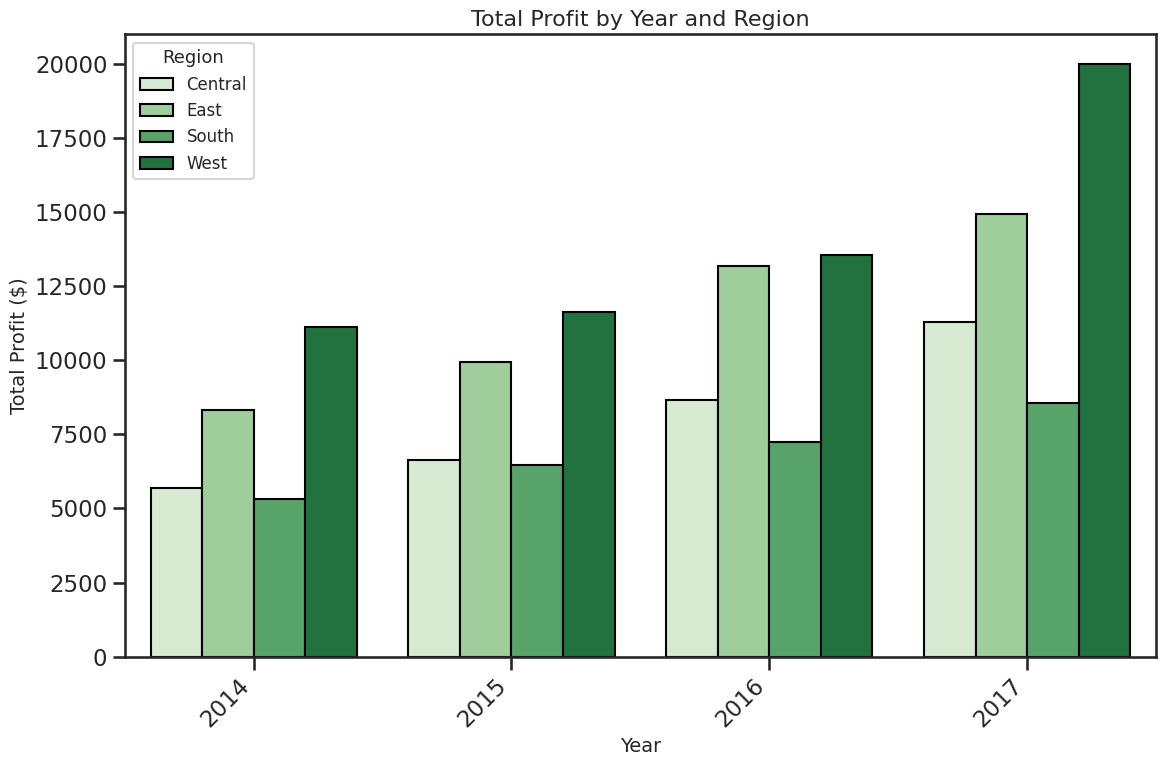

In [10]:
# Aggregate profits by year and region
profit_by_year_region = (
    data_profits.groupby(["Order Year", "Region"])["Profit"]
    .sum()
    .reset_index()
    .sort_values(by="Profit", ascending=False)
)

# Plot the total profit by year and region
plt.figure(figsize=(12, 8))
sns.barplot(
    data=profit_by_year_region,
    x="Order Year",
    y="Profit",
    hue="Region",
    palette="Greens",  # Green palette for positive profits
    edgecolor="black"
)
plt.title("Total Profit by Year and Region", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Profit ($)", fontsize=14)
plt.legend(title="Region", fontsize=12, title_fontsize=13)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [17]:
# Define the columns for aggregation and renaming
aggregation_columns = {
    'Profit': 'sum',
    'Profit Margin': 'mean',
    'Profitability Ratio': 'mean',  # New metric
    'Estimated Cost': 'sum',
    'Sales': 'sum',
    'Discount': 'mean',
    'Order Count': 'sum',
    'Quantity': 'sum',
    'Regional Market Share (%)': 'mean'  # New metric
}

rename_columns = {
    'Profit': 'Total Loss',
    'Profit Margin': 'Average Profit Margin',
    'Profitability Ratio': 'Average Profitability Ratio',
    'Estimated Cost': 'Total Estimated Cost',
    'Sales': 'Total Sales',
    'Discount': 'Average Discount',
    'Order Count': 'Total Orders',
    'Quantity': 'Total Quantity',
    'Regional Market Share (%)': 'Average Regional Market Share'
}

# Convert 'Discount' to numeric
data_profits['Discount'] = pd.to_numeric(data_losses['Discount'], errors='coerce')
data_profits['Quantity'] = pd.to_numeric(data_profits['Quantity'], errors='coerce')

# Aggregate profits by year using the same aggregation dictionary
profit_table = data_profits.groupby('Order Year').agg(aggregation_columns).reset_index()

# Rename columns for clarity
profit_table.rename(columns={
    'Profit': 'Total Profit',
    'Profit Margin': 'Average Profit Margin',
    'Profitability Ratio': 'Average Profitability Ratio',
    'Estimated Cost': 'Total Estimated Cost',
    'Sales': 'Total Sales',
    'Discount': 'Average Discount',
    'Order Count': 'Total Orders',
    'Quantity': 'Total Quantity',
    'Regional Market Share (%)': 'Average Regional Market Share'
}, inplace=True)

# Sort the table by Total Profit in descending order for better analysis
profit_table = profit_table.sort_values(by='Total Profit', ascending=False)

# Display the table
profit_table


,Order Year,Total Profit,Average Profit Margin,Average Profitability Ratio,Total Estimated Cost,Total Sales,Average Discount,Total Orders,Total Quantity,Average Regional Market Share
3,2017,54778.4149,30.059408,48.641321,161834.0241,216612.4390,NaN,16698,8721,27.107126
2,2016,42651.7497,30.511063,49.645653,125656.9808,168308.7305,NaN,13581,6875,26.907243
1,2015,34699.0193,30.200558,49.198704,102305.1867,137004.2060,NaN,10310,5366,26.873010
0,2014,30468.2126,30.258358,49.063512,96018.1404,126486.3530,NaN,9913,5188,26.848040


In [15]:
# Convert 'Discount' to numeric
data_losses['Discount'] = pd.to_numeric(data_losses['Discount'], errors='coerce')
data_losses['Quantity'] = pd.to_numeric(data_profits['Quantity'], errors='coerce')

# Aggregate losses by year using the `aggregation_columns` dictionary
loss_table = data_losses.groupby('Order Year').agg(aggregation_columns).reset_index()

# Rename columns using the `rename_columns` dictionary
loss_table.rename(columns=rename_columns, inplace=True)

# Sort the table by Total Loss in ascending order for better analysis
loss_table = loss_table.sort_values(by='Total Loss', ascending=True)
loss_table

,Order Year,Total Loss,Average Profit Margin,Average Profitability Ratio,Total Estimated Cost,Total Sales,Average Discount,Total Orders,Total Quantity,Average Regional Market Share
3,2017,-20171.9675,-69.677682,-33.165350,76097.1149,55925.1474,0.498200,3704,1894,25.086820
2,2016,-17224.8596,-63.358671,-32.119543,64873.4164,47648.5568,0.498900,3025,1491,25.177188
1,2015,-14491.3017,-68.466073,-33.185666,50090.4073,35599.1056,0.507130,2463,1239,25.053461
0,2014,-11858.8411,-70.436050,-33.864667,43992.3582,32133.5171,0.503742,2117,1079,24.979207


### Analysis of Loss by Year

#### Key Observations:

1. **Trend in Total Loss:**
   - The losses increase significantly over the years:
     - **2014**: $-11,858.84
     - **2015**: $-14,491.30
     - **2016**: $-17,224.86
     - **2017**: $-20,171.97
   - This consistent increase suggests a growing inefficiency in the business operations or an inability to address the drivers of losses effectively over time.

2. **Average Profit Margin:**
   - Profit margins remain negative across all years, with a slight improvement in 2016 compared to 2014 and 2015:
     - **2014**: -70.44%
     - **2015**: -68.47%
     - **2016**: -63.36%
     - **2017**: -69.68%
   - The decline in 2017 indicates a regression after potential improvements in 2016.

3. **Total Estimated Cost:**
   - The costs are rising year over year, aligning with the trend in losses:
     - **2014**: $43,992.36
     - **2015**: $50,090.41
     - **2016**: $64,873.42
     - **2017**: $76,097.11
   - This significant increase in costs suggests inefficiencies in sourcing, production, or operations.

4. **Total Sales:**
   - While sales increase over time, they do not keep pace with the rising costs, leading to higher losses:
     - **2014**: $32,133.52
     - **2015**: $35,599.11
     - **2016**: $47,648.56
     - **2017**: $55,925.15

5. **Average Discount:**
   - Discounts hover around 50% across all years, with minor fluctuations:
     - This aggressive discounting strategy likely contributes heavily to the negative profit margins and rising losses.

6. **Total Orders and Quantity:**
   - Both total orders and quantities increase steadily:
     - **Orders**: From 2,117 in 2014 to 3,704 in 2017
     - **Quantity**: From 1,079 in 2014 to 1,894 in 2017
   - This suggests growing sales volume, but the lack of profitability indicates issues with cost structure, pricing, or discount policies.

---

#### Recommendations:
1. **Reassess Discount Strategy:**
   - The high discount rates (around 50%) are a major contributor to the losses.
   - Implement targeted discounts based on customer segments or reduce blanket discounts.

2. **Cost Efficiency:**
   - Investigate rising costs to identify inefficiencies in sourcing, production, or distribution.

3. **Focus on High-Margin Products:**
   - Analyze product-level profitability to prioritize high-margin products.

4. **Address Regional or Sub-Category Trends:**
   - Losses might vary across regions or sub-categories, requiring tailored solutions.

5. **Long-Term Strategy:**
   - Develop a plan to gradually reduce discounts while improving operational efficiency to stabilize profit margins.



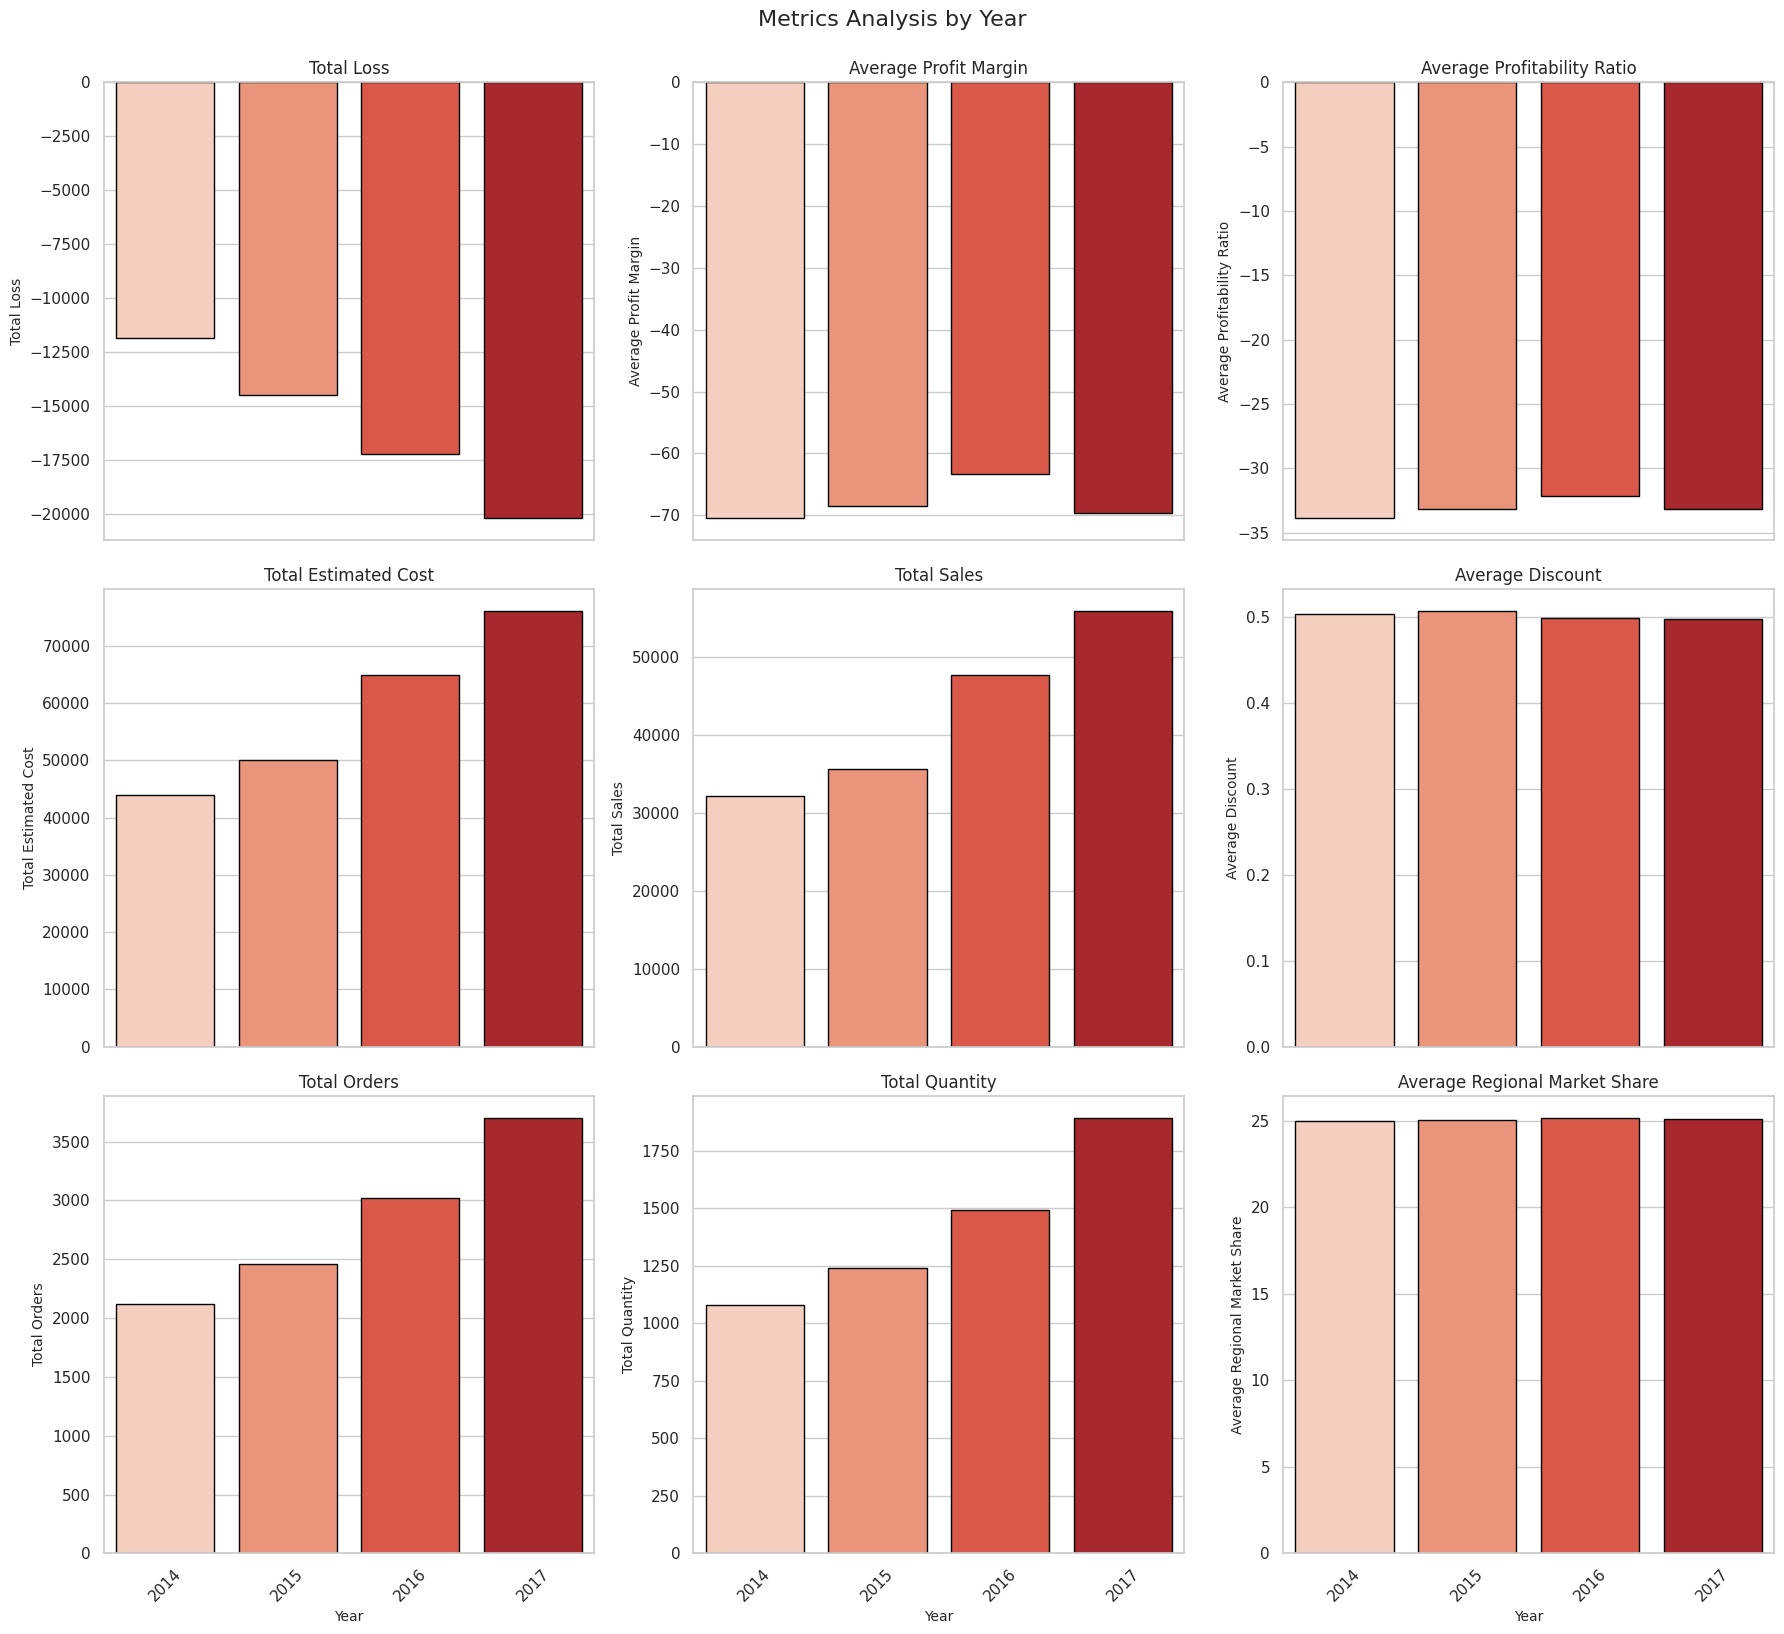

In [ ]:
# Define the metrics to plot
metrics_to_plot = [
    'Total Loss',
    'Average Profit Margin',
    'Average Profitability Ratio',
    'Total Estimated Cost',
    'Total Sales',
    'Average Discount',
    'Total Orders',
    'Total Quantity',
    'Average Regional Market Share'
]

# Set up the 3x3 grid for plotting
sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(3, 3, figsize=(18, 16), sharex=True)

# Iterate over metrics and plot on respective axes
for metric, ax in zip(metrics_to_plot, axes.flatten()):
    sns.barplot(
        data=loss_table,  # Using the correct loss table
        x="Order Year",
        y=metric,
        palette="Reds",
        edgecolor="black",
        ax=ax
    )
    ax.set_title(f"{metric}", fontsize=12)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis="x", rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Metrics Analysis by Year", fontsize=16, y=1.02)

# Show the plots
plt.show()


In [ ]:
# Aggregate losses by region
loss_by_region_table = data_losses.groupby('Region').agg(aggregation_columns).reset_index()

# Rename columns for clarity
loss_by_region_table.rename(columns=rename_columns, inplace=True)

# Sort the table by Total Loss in ascending order for better analysis
loss_by_region_table = loss_by_region_table.sort_values(by='Total Loss', ascending=True)
loss_by_region_table

,Region,Total Loss,Average Profit Margin,Average Profitability Ratio,Total Estimated Cost,Total Sales,Average Discount,Total Orders,Total Quantity,Average Regional Market Share
0,Central,-29500.5321,-102.425645,-41.774978,83395.3615,53894.8294,0.574338,4629,2378,22.378538
1,East,-18367.5434,-43.006531,-27.115161,79762.3744,61394.8310,0.463931,3270,1518,28.410681
3,West,-10442.6422,-41.581387,-24.230721,47371.8332,36929.1910,0.385846,1886,1000,33.646967
2,South,-5436.2522,-49.910709,-30.263445,24523.7277,19087.4755,0.505000,1524,807,15.563814


The analysis of the loss by region table highlights significant disparities in profitability, costs, discounts, and sales across regions. Here are the key observations:

### **Key Metrics Analysis**
1. **Total Loss**:
   - **Central Region** has the largest total loss at **$-29,500.53**, indicating it contributes the most to overall losses.
   - **South Region** has the smallest total loss at **$-5,436.25**, suggesting relatively better performance compared to other regions.

2. **Average Profit Margin**:
   - The **Central Region** stands out with an extremely low average profit margin (**-102.43%**), suggesting significant inefficiencies or issues such as high discounts, elevated costs, or unprofitable product pricing.
   - The **West Region** has the highest average profit margin among the loss-making regions (**-41.58%**), indicating a comparatively better ability to manage margins.

3. **Average Profitability Ratio**:
   - The **Central Region** also has the worst average profitability ratio (**-41.77%**), indicating poor cost-to-sales efficiency.
   - The **West Region** again fares better than others at **-24.23%**, implying slightly more control over profitability.

4. **Total Estimated Cost and Total Sales**:
   - **East Region** shows high total costs (**$79,762.37**) and sales (**$61,394.83**), yet still incurs significant losses (**$-18,367.54**). This indicates inefficiencies in pricing or heavy discounting despite strong sales volumes.
   - The **South Region** has the lowest total costs (**$24,523.73**) and sales (**$19,087.48**) but proportionally lower losses as well.

5. **Average Discount**:
   - **Central Region** offers the steepest average discount (**57.43%**), which likely contributes to its substantial losses.
   - **West Region** has the lowest average discount (**38.58%**), reinforcing its better relative performance.

6. **Total Orders and Total Quantity**:
   - **Central Region** has the highest number of orders (**4,629**) and quantities sold (**2,378**), yet incurs the largest losses, indicating that high volume does not compensate for inefficiencies or heavy discounting.
   - **South Region** processes the lowest total orders (**1,524**) and quantities sold (**807**), correlating with its smaller losses.

7. **Average Regional Market Share**:
   - The **West Region** has the largest market share (**33.65%**), which may help mitigate its losses.
   - The **South Region** has the smallest market share (**15.56%**), reflecting limited presence and smaller losses.

### **Recommendations to Reduce Losses**
1. **Focus on the Central Region**:
   - High discounts and extremely low profit margins are major drivers of losses. Investigate why such steep discounts are necessary and whether they can be reduced without sacrificing sales.
   - Review pricing strategies and cost structures to identify inefficiencies.

2. **Reassess the East Region**:
   - Despite high sales, this region still incurs significant losses. This suggests that pricing strategies or cost management needs improvement.

3. **Encourage Practices from the West Region**:
   - The West has the best relative performance among the loss-making regions due to lower discounts and better cost control. Analyze and apply these strategies to other regions.

4. **Optimize the South Region**:
   - Although losses are lower, the region has a small market share. Explore strategies to grow market share while maintaining cost efficiency.

### **Priority Order to Address Regions**:
1. **Central**: Largest losses, steep discounts, poor margins.
2. **East**: Significant losses despite strong sales.
3. **South**: Potential for improvement with a small market share.
4. **West**: Performances are relatively better but can be optimized further.

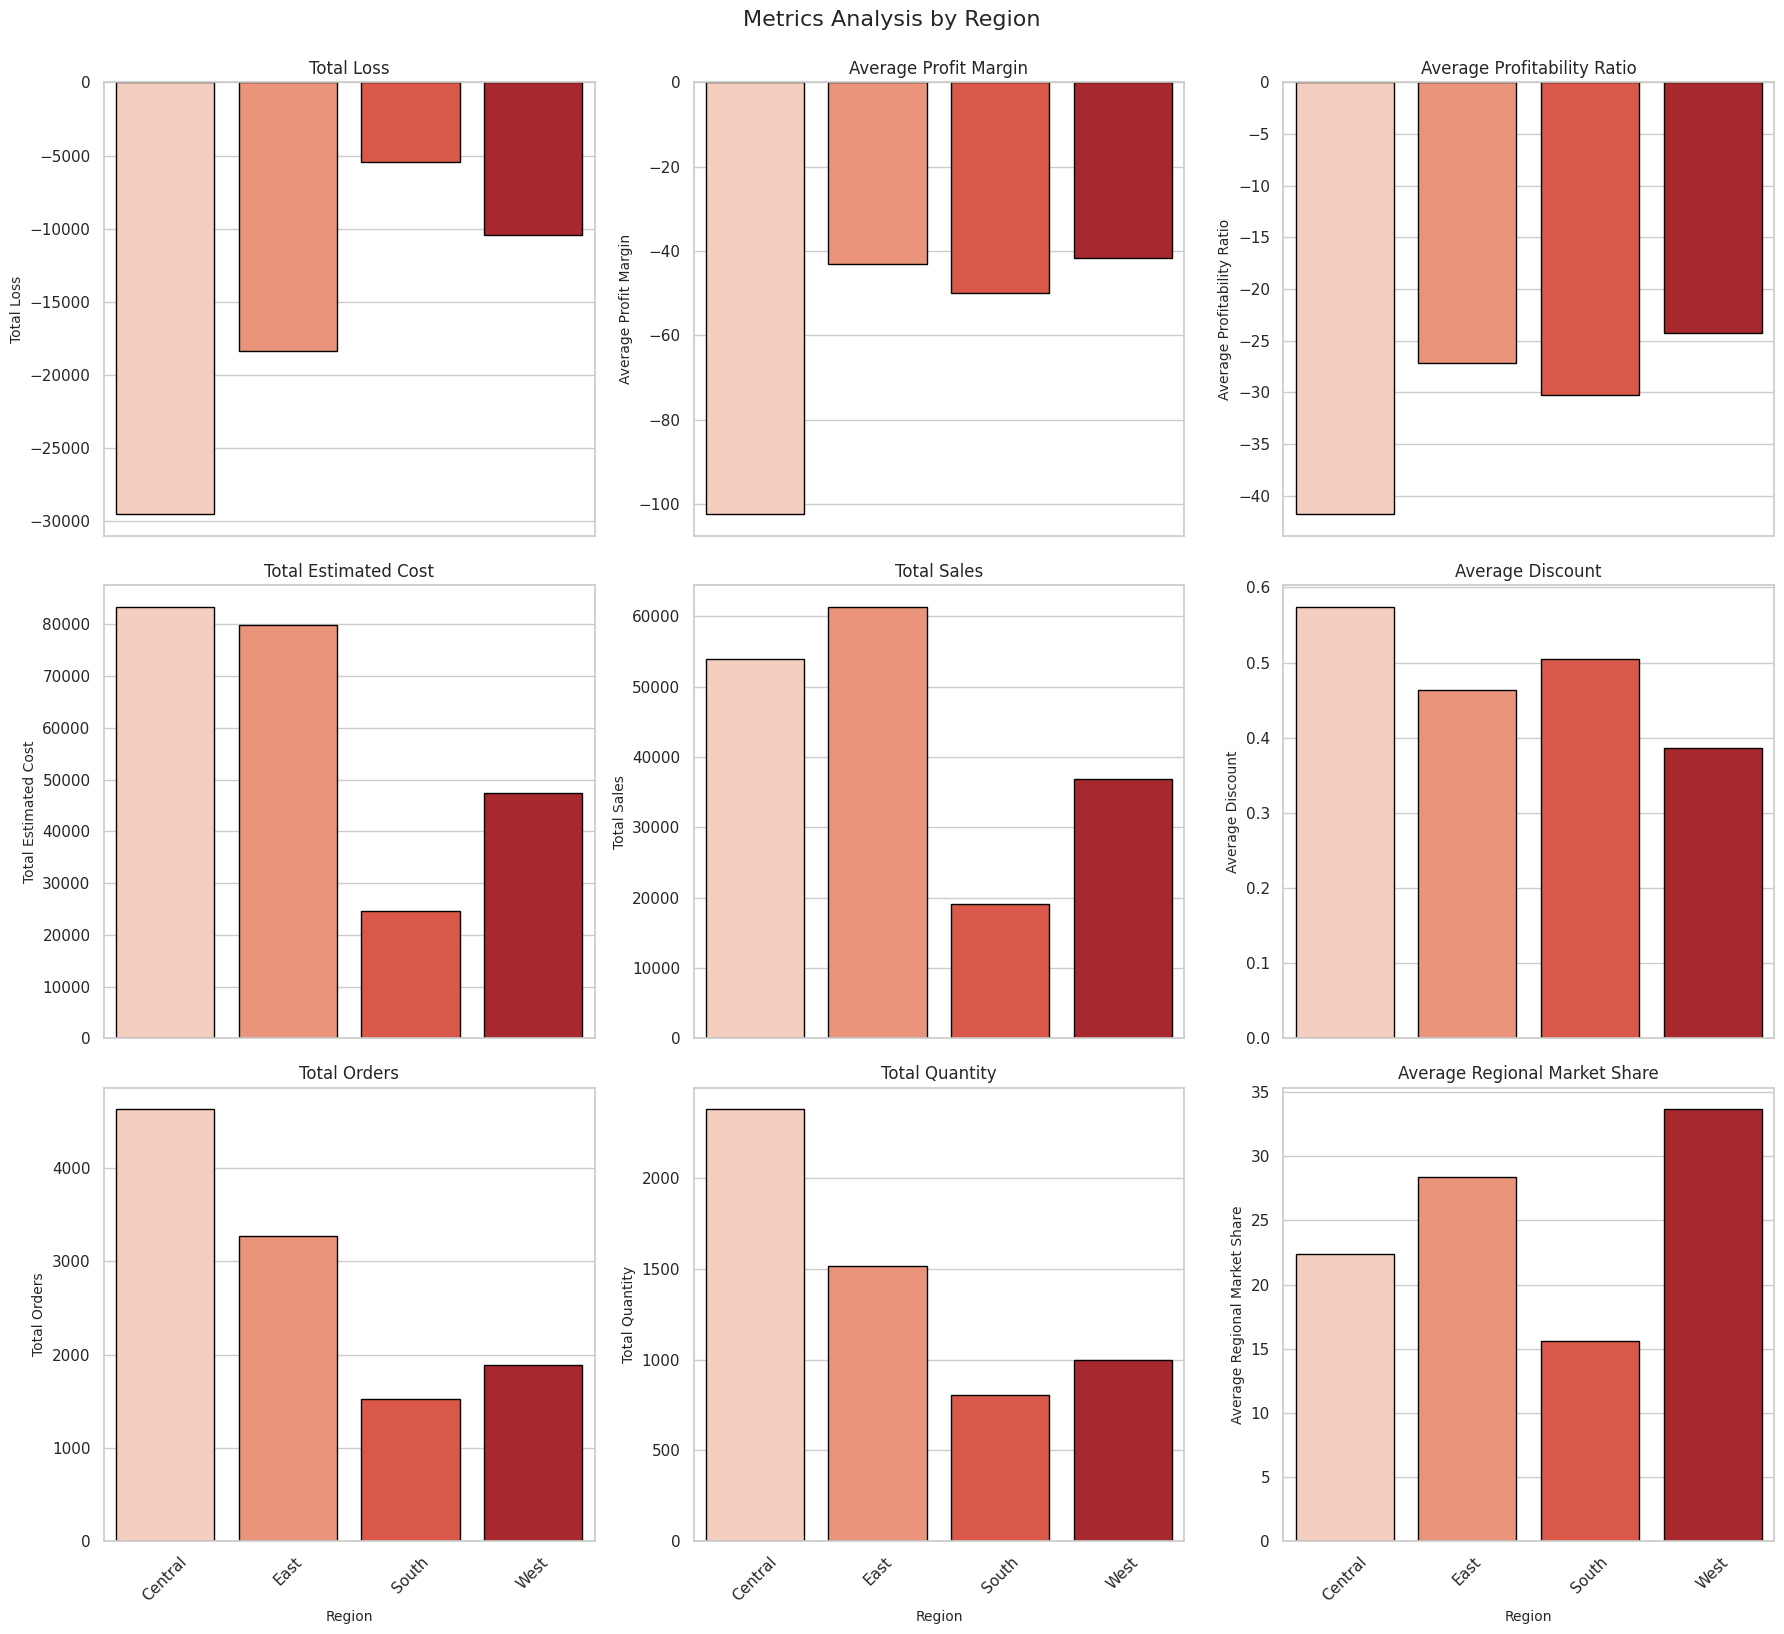

In [ ]:
# Set up the 3x3 grid for plotting
sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(3, 3, figsize=(18, 16), sharex=True)

# Iterate over metrics and plot on respective axes
for metric, ax in zip(metrics_to_plot, axes.flatten()):
    sns.barplot(
        data=loss_by_region_table,
        x="Region",
        y=metric,
        palette="Reds_r",
        edgecolor="black",
        ax=ax
    )
    ax.set_title(f"{metric}", fontsize=12)
    ax.set_xlabel("Region", fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis="x", rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Metrics Analysis by Region", fontsize=16, y=1.02)

# Show the plots
plt.show()

In [ ]:
# Aggregate losses by category
loss_by_category_table = data_losses.groupby('Category').agg(aggregation_columns).reset_index()

# Rename columns for clarity
loss_by_category_table.rename(columns=rename_columns, inplace=True)

# Sort the table by Total Loss in ascending order for better analysis
loss_by_category_table = loss_by_category_table.sort_values(by='Total Loss', ascending=True)

# Display the table
loss_by_category_table


,Category,Total Loss,Average Profit Margin,Average Profitability Ratio,Total Estimated Cost,Total Sales,Average Discount,Total Orders,Total Quantity,Average Regional Market Share
0,Furniture,-28920.4334,-36.453331,-22.484602,132483.4673,103563.0339,0.384527,3830,1793,25.811137
1,Office Supplies,-26549.8461,-100.769116,-44.436702,64158.8031,37608.9570,0.629271,5923,3162,24.022973
2,Technology,-8276.6904,-22.680370,-16.396193,38411.0264,30134.3360,0.311111,1556,748,27.242244


### Summary of Losses by Category

#### Key Takeaways:

1. **Furniture**:  
   - The largest contributor to losses (**\$-28,920.43**).
   - Losses are driven by **high costs** (**$132,483.47**) and **moderate discounts** (38.45%).
   - Sales volume is relatively high (**\$103,563.03**), but costs and inefficiencies erode profitability.  
   **Recommendation**: Focus on cost reduction and targeted discounting.

2. **Office Supplies**:  
   - The second-largest contributor to losses (**\$-26,549.85**).
   - Losses are heavily impacted by **extremely high discounts** (62.93%), the highest among categories.
   - Despite the highest order and quantity volume, sales revenue (**\$37,608.96**) is disproportionately low compared to costs.  
   **Recommendation**: Reduce discounts, review pricing strategy, and reconsider the high-volume but low-margin approach.

3. **Technology**:  
   - The smallest contributor to losses (**$-8,276.69**).
   - Losses are comparatively well-managed with the **lowest discounts** (31.11%) and the **best profit margins** (-22.68%).
   - Costs and sales are aligned better than in other categories.  
   **Recommendation**: Maintain current strategies and focus on increasing sales volume to further reduce losses.

#### Overall Focus:
- **Office Supplies** requires the most immediate attention due to its steep discounts and poor profit margins.
- **Furniture** is the next priority, with high costs and moderate discounts contributing to losses.
- **Technology** shows manageable losses and can be optimized by boosting sales.  

By addressing inefficiencies and discounting practices in **Office Supplies** and **Furniture**, the overall loss can be significantly reduced.

In [ ]:
# Create a copy of the data to avoid warnings
filtered_data = data_losses.copy()

# Convert 'Sub-Category' and 'Category' to 'object' to reset categories
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].astype('object')
filtered_data['Category'] = filtered_data['Category'].astype('object')

# Reset 'Sub-Category' and 'Category' as categorical with only relevant levels
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'])
filtered_data['Category'] = pd.Categorical(filtered_data['Category'])

# Display the updated categories for verification
print("Sub-Category categories:", filtered_data['Sub-Category'].cat.categories)
print("Category categories:", filtered_data['Category'].cat.categories)


Sub-Category categories: Index(['Accessories', 'Appliances', 'Binders', 'Bookcases', 'Chairs',
       'Fasteners', 'Furnishings', 'Machines', 'Phones', 'Storage', 'Supplies',
       'Tables'],
      dtype='object')
Category categories: Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object')


In [ ]:
# Aggregate losses by sub-category
loss_by_subcategory_table = filtered_data.groupby(['Category', 'Sub-Category']).agg(aggregation_columns).reset_index()

# Rename columns for clarity
loss_by_subcategory_table.rename(columns=rename_columns, inplace=True)

# Sort the table by Total Loss in ascending order for better analysis
loss_by_subcategory_table = loss_by_subcategory_table.sort_values(by='Total Loss', ascending=True)

# Display the table
loss_by_subcategory_table.reset_index(drop=True).head(10)


,Category,Sub-Category,Total Loss,Average Profit Margin,Average Profitability Ratio,Total Estimated Cost,Total Sales,Average Discount,Total Orders,Total Quantity,Average Regional Market Share
0,Office Supplies,Binders,-13971.8382,-107.967960,-49.964897,27254.7572,13282.9190,0.738111,4224,2350,24.044327
1,Furniture,Tables,-10195.7547,-32.090672,-22.361340,41945.3332,31749.5785,0.372656,887,361,26.960301
2,Office Supplies,Appliances,-8629.6412,-253.358209,-71.580923,12012.1752,3382.5340,0.800000,492,235,22.378538
3,Furniture,Bookcases,-7246.3084,-47.724632,-24.323810,27647.8648,20401.5564,0.365357,548,279,27.299731
4,Furniture,Furnishings,-6314.5820,-59.700920,-34.393234,17016.9620,10702.3800,0.538650,1146,576,22.976878
5,Furniture,Chairs,-5163.7883,-12.580612,-10.599899,45873.3073,40709.5190,0.258857,1249,577,26.895991
6,Technology,Machines,-3934.8785,-74.818182,-38.453814,8870.0085,4935.1300,0.636364,143,61,26.716575
7,Office Supplies,Storage,-3552.3881,-18.233696,-15.119090,22602.6521,19050.2640,0.200000,950,434,24.312847
8,Technology,Phones,-3459.9548,-22.952899,-18.396024,19602.7128,16142.7580,0.333913,779,370,28.766790
9,Technology,Accessories,-881.8571,-9.289773,-8.268374,9938.3051,9056.4480,0.200000,634,317,25.381356


### Key Takeaways

#### **Top Loss-Making Sub-Categories**
1. **Binders (Office Supplies)**:
   - Largest loss: $-13,971.84.
   - **High Discounts**: 73.8% average, driving inefficiencies despite high order volume (4,224).

2. **Tables (Furniture)**:
   - Loss: $-10,195.75.
   - **High Costs**: \$41,945.33 in estimated costs with moderate discounts (37.3%).

3. **Appliances (Office Supplies)**:
   - Loss: \$-8,629.64.
   - **Extreme Discounts**: 80% discount with low sales ($3,382.53).

4. **Bookcases and Furnishings (Furniture)**:
   - Combined losses exceed $13,560.
   - High costs and discounts (36–54%) are key drivers.

#### **Technology Losses**
- **Machines**: Loss of \$-3,934.88, with high discounts (63.6%) and low demand.
- **Phones**: Loss of $-3,459.95 despite higher sales, indicating pricing inefficiencies.

---

### **General Insights**
1. **High Discounts Are Key Drivers**:
   - Binders, Appliances, and Machines show discounts exceeding 60%, requiring immediate review.
2. **Cost Inefficiencies**:
   - Furniture sub-categories (Tables, Bookcases, Furnishings) show high costs relative to sales.
3. **Low-Demand Products**:
   - Appliances and Machines have poor sales despite aggressive discounts.
4. **Prioritize Key Sub-Categories**:
   - Address losses in **Binders**, **Tables**, and **Appliances** to make the largest impact.

---

### **Next Steps**
- Reduce excessive discounts, particularly for Binders and Appliances.
- Optimize cost structures in Furniture sub-categories.
- Refocus promotions on higher-demand sub-categories like Phones and Accessories.

Sub-Category categories: Index(['Appliances', 'Binders', 'Bookcases', 'Tables'], dtype='object')
Category categories: Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object')


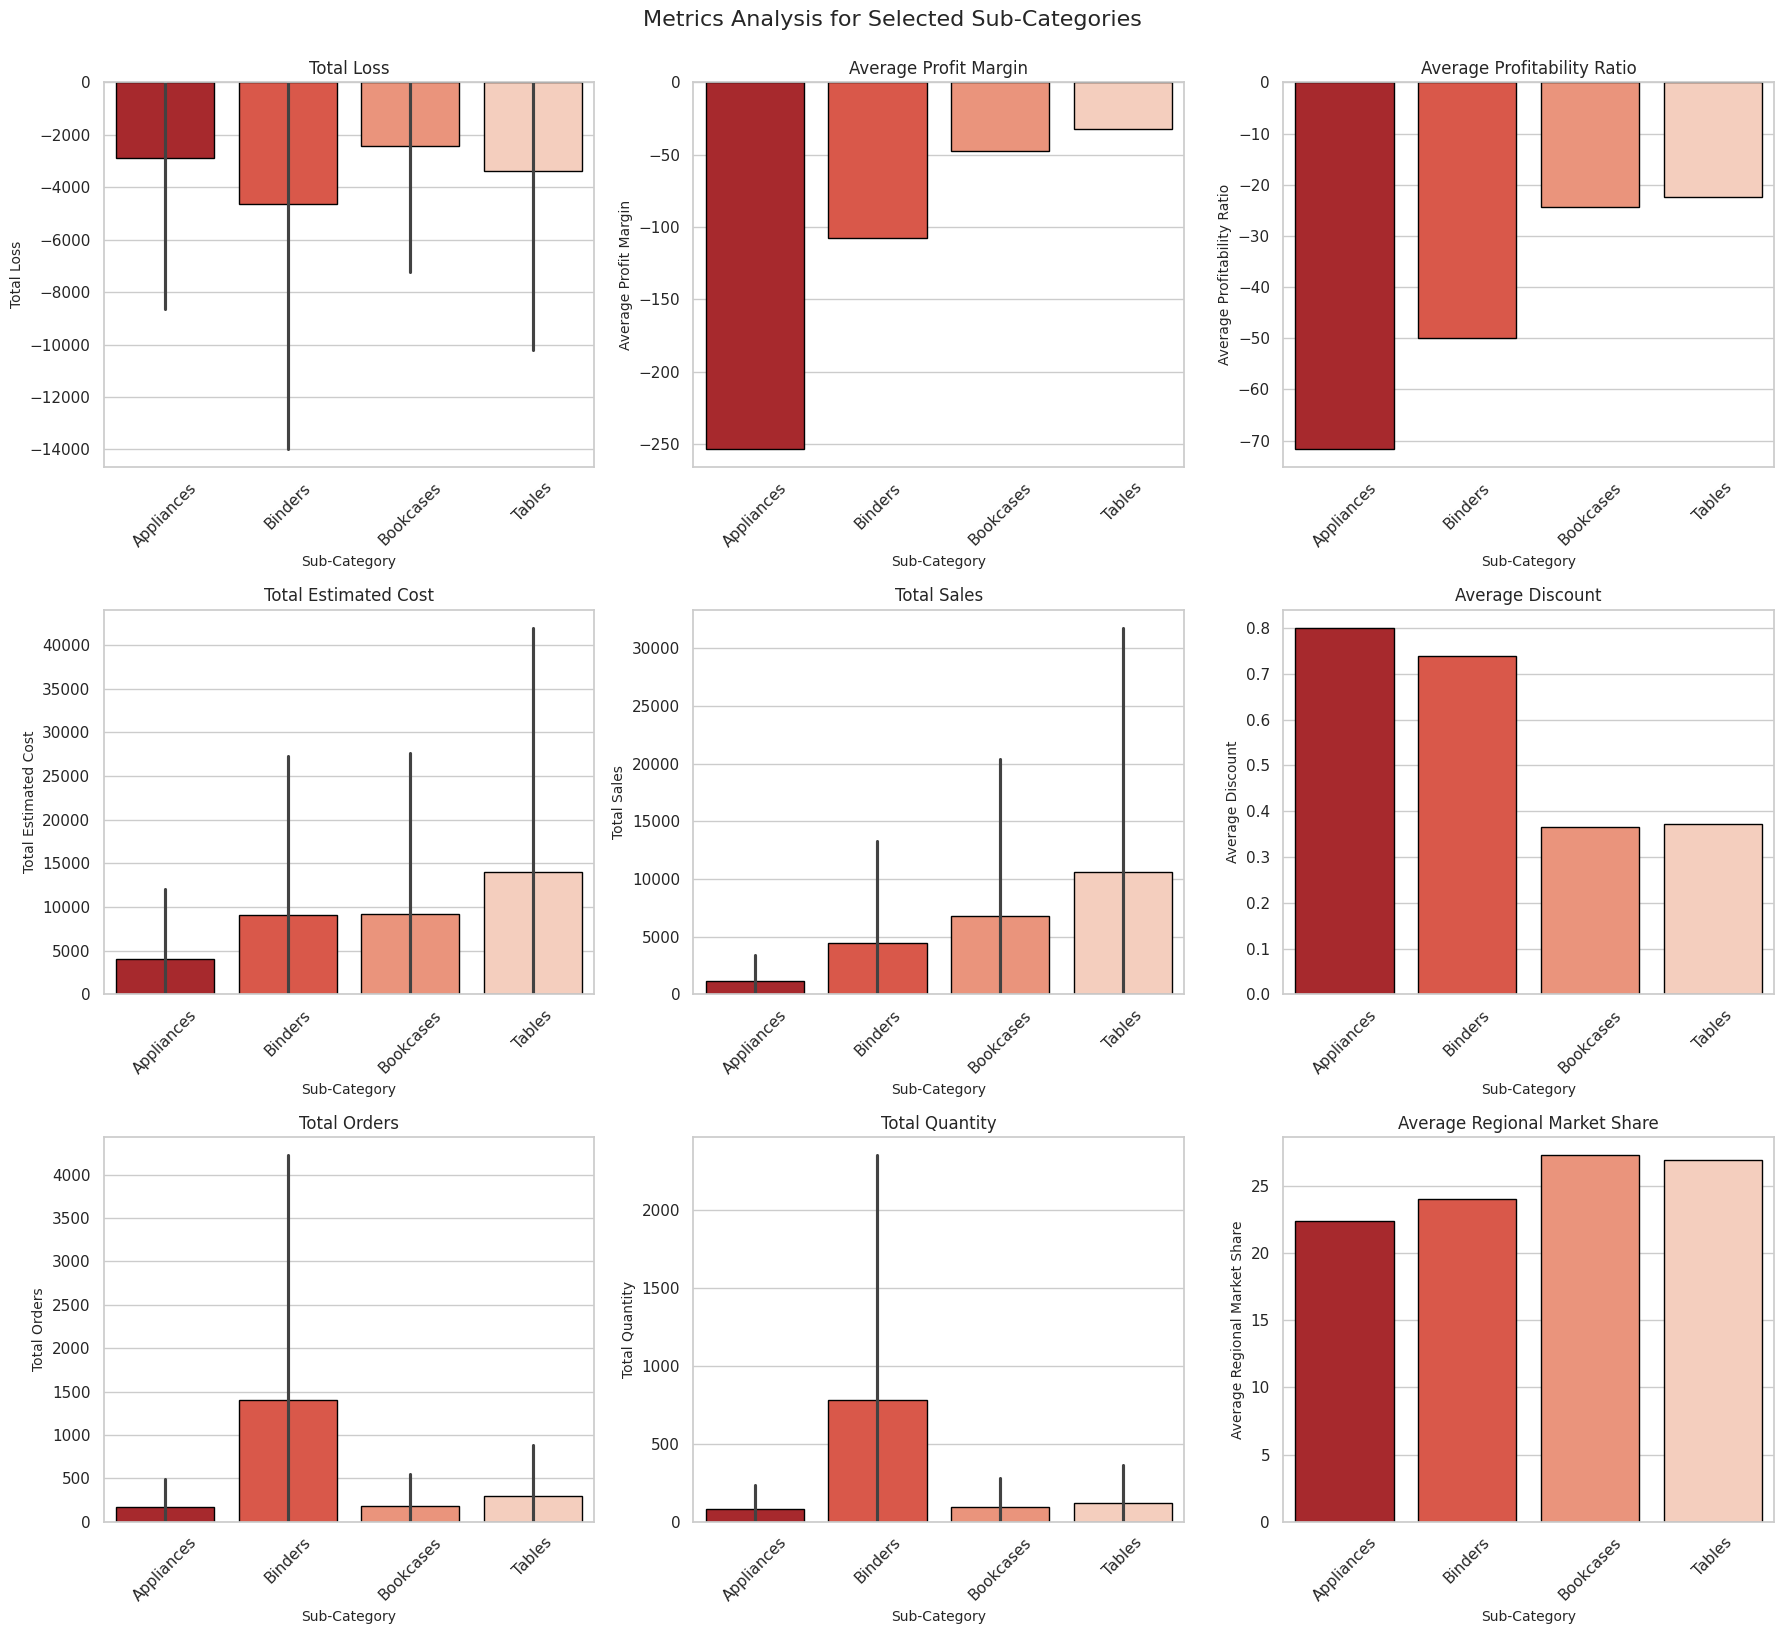

In [ ]:
# Define the subcategories to include
selected_subcategories = ['Binders', 'Tables', 'Appliances', 'Bookcases']

# Filter the data for the selected subcategories
filtered_data = loss_by_subcategory_table[loss_by_subcategory_table['Sub-Category'].isin(selected_subcategories)]

# Convert 'Sub-Category' and 'Category' to 'object' to reset categories
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].astype('object')
filtered_data['Category'] = filtered_data['Category'].astype('object')

# Reset 'Sub-Category' and 'Category' as categorical with only relevant levels
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'])
filtered_data['Category'] = pd.Categorical(filtered_data['Category'])

# Display the updated categories for verification
print("Sub-Category categories:", filtered_data['Sub-Category'].cat.categories)
print("Category categories:", filtered_data['Category'].cat.categories)

# Set up the 3x3 grid for plotting
sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(3, 3, figsize=(18, 16), sharex=False)

# Iterate over metrics and plot on respective axes
for metric, ax in zip(metrics_to_plot, axes.flatten()):
    sns.barplot(
        data=filtered_data,
        x="Sub-Category",
        y=metric,
        palette="Reds_r",
        edgecolor="black",
        ax=ax
    )
    ax.set_title(f"{metric}", fontsize=12)
    ax.set_xlabel("Sub-Category", fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis="x", rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Metrics Analysis for Selected Sub-Categories", fontsize=16, y=1.02)

# Show the plots
plt.show()

In [ ]:
cat_region_df = data_losses[data_losses['Sub-Category'].isin(selected_subcategories)]

# Aggregate losses by sub-category and region
loss_by_subcategory_region = cat_region_df.groupby(['Sub-Category', 'Region']).agg(aggregation_columns).reset_index()

# Rename columns for clarity
loss_by_subcategory_region.rename(columns=rename_columns, inplace=True)

# Sort the table by Total Loss in ascending order for better readability
loss_by_subcategory_region = loss_by_subcategory_region.sort_values(by='Total Loss', ascending=True)

# Display the table
loss_by_subcategory_region[loss_by_subcategory_region['Total Loss'] < 0].reset_index(drop=True)


,Sub-Category,Region,Total Loss,Average Profit Margin,Average Profitability Ratio,Total Estimated Cost,Total Sales,Average Discount,Total Orders,Total Quantity,Average Regional Market Share
0,Appliances,Central,-8629.6412,-253.358209,-71.580923,12012.1752,3382.5340,0.800000,492,235,22.378538
1,Binders,Central,-7373.8978,-162.234513,-61.828528,11853.0018,4479.1040,0.800000,1618,917,22.378538
2,Tables,East,-4153.1769,-29.034392,-21.702162,18534.9499,14381.7730,0.377778,379,138,28.410681
3,Bookcases,West,-3300.0164,-90.363108,-35.085839,8723.4964,5423.4800,0.435185,186,93,33.646967
4,Binders,East,-3014.0333,-75.160643,-42.854968,7006.6043,3992.5710,0.700000,1194,596,28.410681
5,Bookcases,East,-2584.5887,-41.105769,-26.231189,9314.4747,6729.8860,0.384615,169,89,28.410681
6,Binders,South,-2513.2068,-74.365079,-42.603982,5847.8148,3334.6080,0.700000,880,511,15.563814
7,Tables,West,-2436.6370,-31.193548,-19.928148,9646.0380,7209.4010,0.335484,189,100,33.646967
8,Tables,Central,-2249.6732,-35.238095,-23.612770,9001.4172,6751.7440,0.380000,215,83,22.378538
9,Tables,South,-1356.2676,-39.662005,-28.013774,4762.9281,3406.6605,0.423077,104,40,15.563814


### Key Takeaways from the Table:

1. **Subcategories with the Largest Losses**:
   - **Appliances (Central)**: Largest loss at \$-8,629.64 with extremely low profit margins (-253.36%) and profitability ratios (-71.58%), driven by very high discounts (80%) and low sales relative to costs.
   - **Binders (Central)**: Significant loss of \$-7,373.90 with steep discounts (80%) and low profitability (-61.83%). High order count (1,618) suggests over-discounting on a large volume.
   - **Tables (East)**: Loss of -4,153.17, primarily due to low profit margins (-29.03%) and a profitability ratio of -21.70%. Costs ($18,534.95) remain high relative to sales (14,381.77).

2. **Regional Contributions to Losses**:
   - **Central Region**: Contributes to the largest losses, especially for **Appliances, Binders, and Tables**, suggesting regional inefficiencies or excessive discounting.
   - **East and West Regions**: Losses are notable for **Tables** and **Bookcases**, with the **West Region (Bookcases)** suffering from high negative margins (-90.36%) and profitability ratios (-35.08%).
   - **South Region**: Has smaller losses compared to other regions, but **Binders** (\$-2,513.21) and **Tables** ($-1,356.27) still show significant inefficiencies.

3. **Impact of Discounts**:
   - **High Discounts**: Categories with the largest losses (e.g., **Binders**, **Appliances**) have consistently high discounts (70-80%), indicating that excessive price cuts are a key driver of losses.
   - **Lower Discounts**: Categories like **Tables (West)** and **Bookcases (South)** show smaller losses with discounts below 50%, suggesting that moderated discounts mitigate losses.

4. **Profitability and Margins**:
   - Categories like **Appliances (Central)** and **Binders (Central)** suffer from severely negative profit margins (-253% and -162%, respectively), highlighting inefficiencies in pricing strategies.
   - **Bookcases (South)**: The least impacted subcategory, with the smallest loss ($-178.08), moderate discounts (20%), and near-breakeven profit margins (-8.93%).

5. **Cost-Sales Dynamics**:
   - Categories with high losses often have costs significantly exceeding sales, as seen in **Appliances (Central)** and **Binders (Central)**.
   - **Tables (South)** and **Bookcases (Central)** show better alignment between costs and sales, leading to relatively smaller losses.

### Summary:
To reduce losses, prioritize addressing:
- **High-Discount Subcategories**: Focus on reducing discounts for **Appliances**, **Binders**, and **Tables**.
- **Central Region**: Investigate inefficiencies in operations or pricing strategies.
- **Cost-Sales Imbalance**: Reevaluate pricing and cost structures for categories with high costs relative to sales.

In [ ]:
# Create a copy of the aggregated data to avoid modifying the original
filtered_aggregated_data = loss_by_subcategory_region.copy()

# Define the filters
selected_regions = ['Central', 'East']
selected_subcategories = ['Appliances', 'Binders', 'Tables']

# Filter the data
filtered_aggregated_data = filtered_aggregated_data[
    (filtered_aggregated_data['Region'].isin(selected_regions)) &
    (filtered_aggregated_data['Sub-Category'].isin(selected_subcategories))
]

# Convert 'Sub-Category' and 'Region' to 'object' to reset categories
filtered_aggregated_data['Sub-Category'] = filtered_aggregated_data['Sub-Category'].astype('object')
filtered_aggregated_data['Region'] = filtered_aggregated_data['Region'].astype('object')

# Reset 'Sub-Category' and 'Region' as categorical with only relevant levels
filtered_aggregated_data['Sub-Category'] = pd.Categorical(filtered_aggregated_data['Sub-Category'])
filtered_aggregated_data['Region'] = pd.Categorical(filtered_aggregated_data['Region'])

# Display the updated categories for verification
print("Sub-Category categories:", filtered_aggregated_data['Sub-Category'].cat.categories)
print("Region categories:", filtered_aggregated_data['Region'].cat.categories)


Sub-Category categories: Index(['Appliances', 'Binders', 'Tables'], dtype='object')
Region categories: Index(['Central', 'East'], dtype='object')


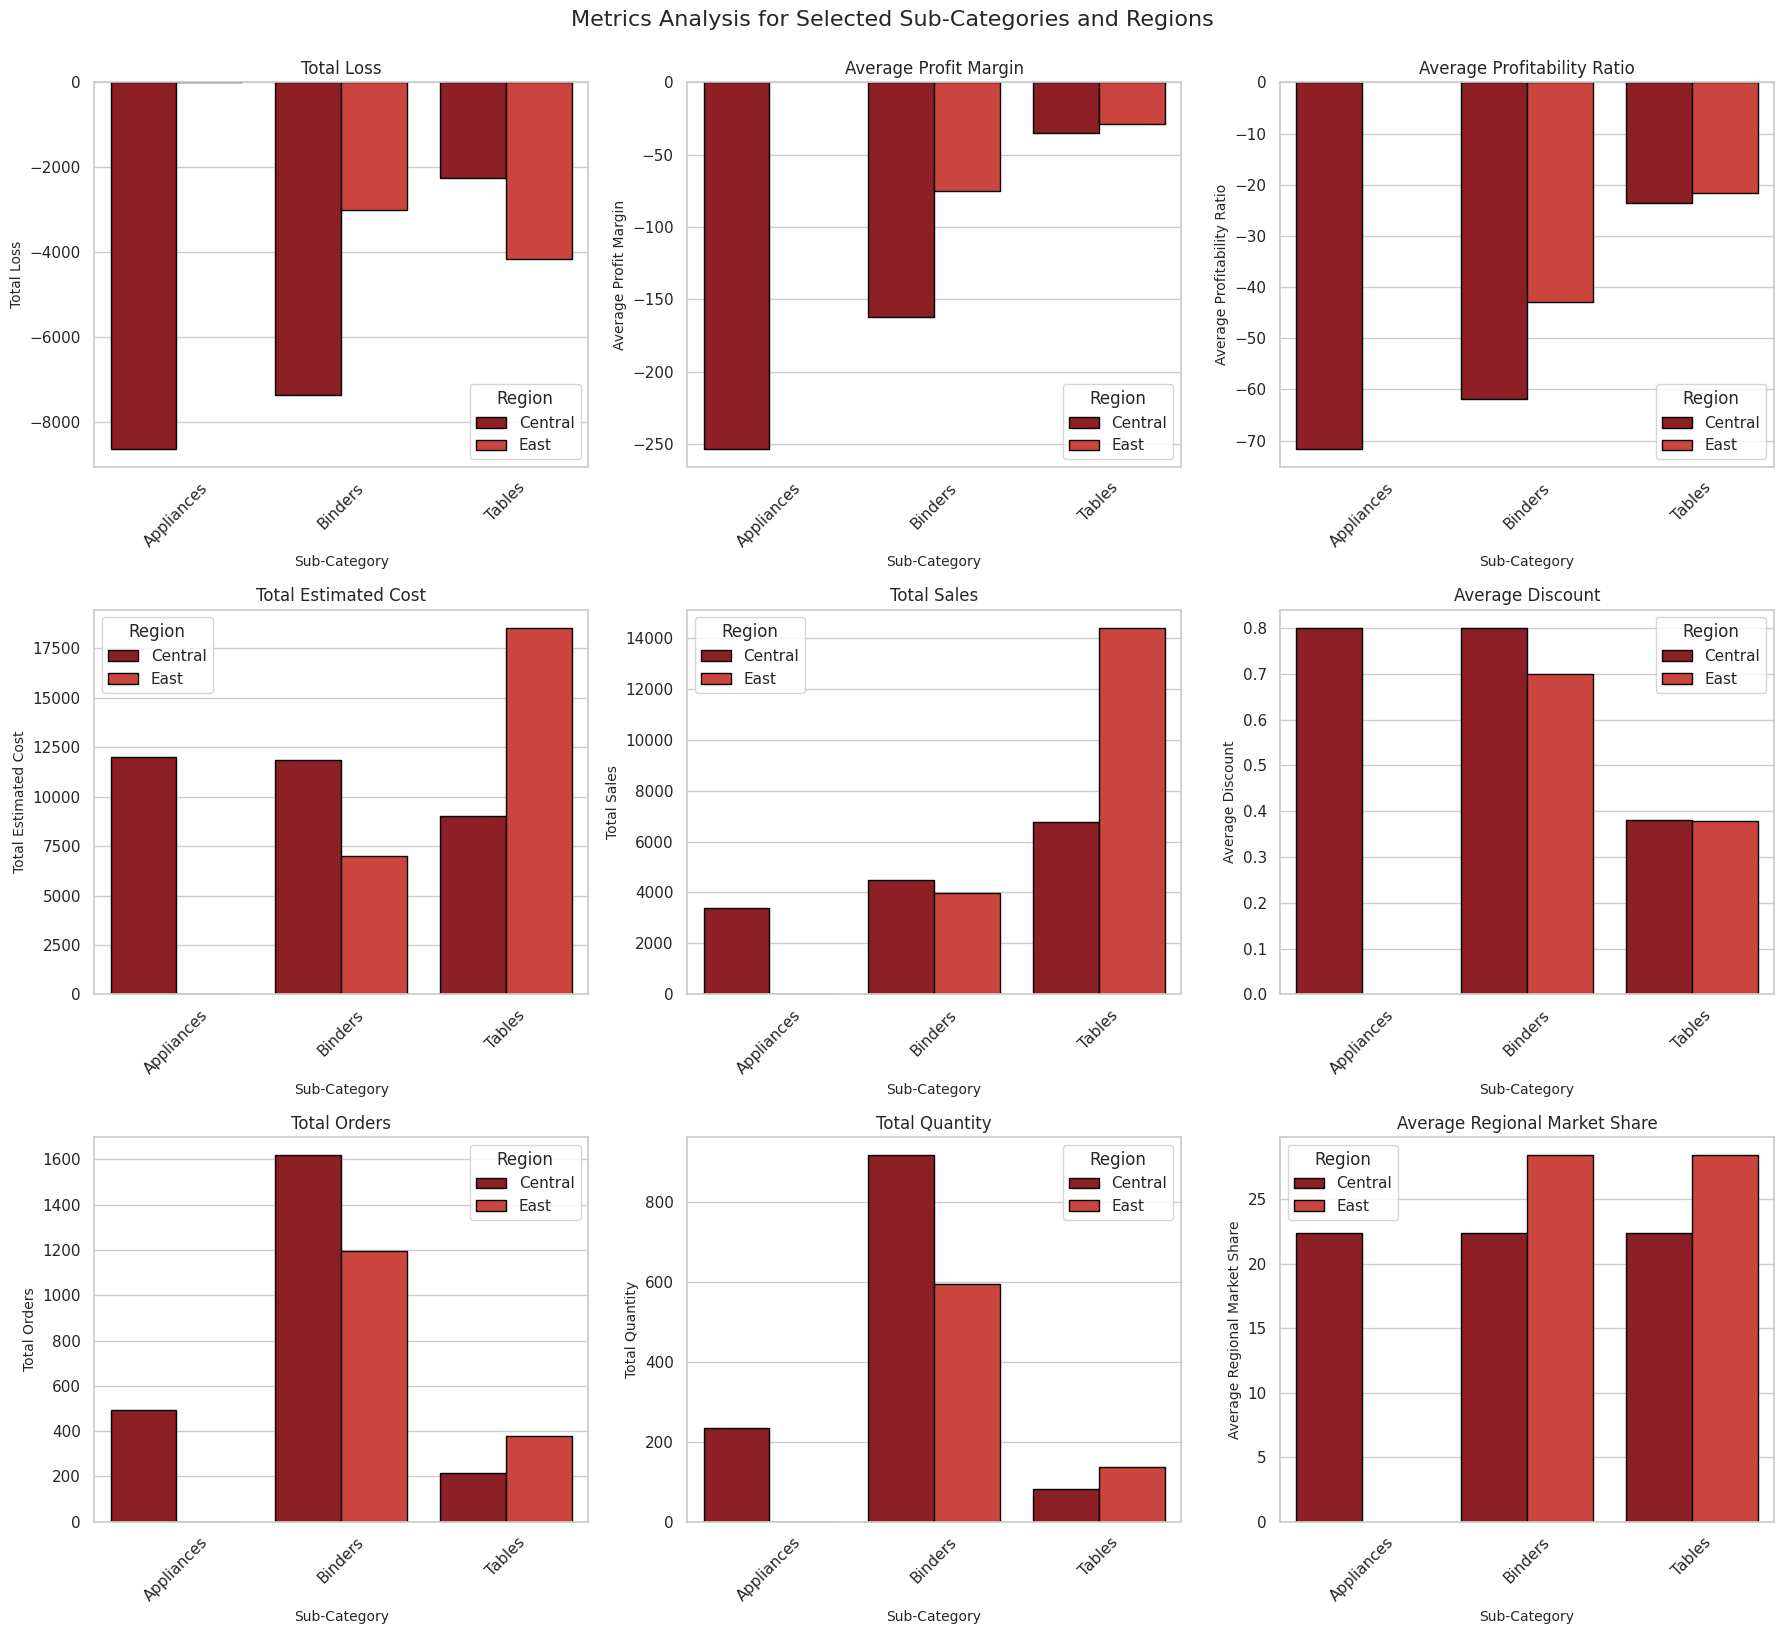

In [ ]:
# Get a custom palette with the two darkest reds
custom_palette = sns.color_palette("Reds", n_colors=8)[-1::-2]  # More divergent colors

# Set up the 3x3 grid for plotting
sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(3, 3, figsize=(18, 16), sharex=False)

# Iterate over metrics and plot on respective axes
for metric, ax in zip(rename_columns.values(), axes.flatten()):  # Use renamed column names
    sns.barplot(
        data=filtered_aggregated_data,
        x="Sub-Category",
        y=metric,
        hue="Region",
        palette=custom_palette,
        edgecolor="black",
        ax=ax
    )
    ax.set_title(f"{metric}", fontsize=12)
    ax.set_xlabel("Sub-Category", fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis="x", rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Metrics Analysis for Selected Sub-Categories and Regions", fontsize=16, y=1.02)

# Show the plots
plt.show()


## Data Prep Utils Script

In [1]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Boxplot for original data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=data[column], color='skyblue')
        plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

        # Boxplot for filtered data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=filtered_data[column], color='lightgreen')
        plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

    return filtered_data, outliers



def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning and deriving metrics.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
    data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
    data['Estimated Cost'] = data['Sales'] - data['Profit']
    data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100
    data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['AOV'] = data['Sales_Customer'] / data['Order Count']

    region_sales = data.groupby('Region')['Sales'].sum()
    data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

    category_profit = data.groupby('Category')['Profit'].sum()
    subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()
    data['Profit per Category'] = data['Category'].map(category_profit)
    data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

    # Standardize specific columns (optional step)
    data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype(str).str.title()

    return data



def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    Retains numeric month columns for reference.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Month Numeric'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Year'] = data['Ship Date'].dt.year
    data['Ship Month Numeric'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert numeric months to month names
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    data['Order Month'] = data['Order Month Numeric'].apply(lambda x: month_names[x - 1])
    data['Ship Month'] = data['Ship Month Numeric'].apply(lambda x: month_names[x - 1])

    # Ensure month columns are ordered categorical variables
    month_categories = pd.CategoricalDtype(categories=month_names, ordered=True)
    data['Order Month'] = data['Order Month'].astype(month_categories)
    data['Ship Month'] = data['Ship Month'].astype(month_categories)

    # Convert year columns to categorical
    data['Order Year'] = data['Order Year'].astype('category')
    data['Ship Year'] = data['Ship Year'].astype('category')

    # Convert other time-based columns to categorical
    time_columns = ['Order Day', 'Order Weekday', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def order_categorical_columns(data):
    """
    Assigns a specific order to key categorical columns for proper visualization and analysis.

    Args:
        data (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: The updated dataset with ordered categorical columns.
    """
    # Define the specific order for weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Define the specific order for months
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Assign weekday order if the column exists
    if 'Order Weekday' in data.columns:
        data['Order Weekday'] = pd.Categorical(
            data['Order Weekday'],
            categories=weekday_order,
            ordered=True
        )

    # Assign month order if the column exists
    if 'Order Month' in data.columns:
        data['Order Month'] = pd.Categorical(
            data['Order Month'],
            categories=month_order,
            ordered=True
        )

    # Assign abbreviated month order if the column exists
    if 'Order Month Abbrev' in data.columns:
        abbrev_month_order = [
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ]
        data['Order Month Abbrev'] = pd.Categorical(
            data['Order Month Abbrev'],
            categories=abbrev_month_order,
            ordered=True
        )

    return data

def add_abbreviated_columns(data):
    """
    Adds abbreviated versions of 'Order Month' and 'Order Weekday' columns to the dataset,
    ensures they are stored as categorical types with the correct order.

    Args:
        data (pd.DataFrame): The dataset with ordered 'Order Month' and 'Order Weekday'.

    Returns:
        pd.DataFrame: The dataset with new abbreviated columns.
    """
    # Define abbreviations for months and weekdays
    month_order = {
        "January": "Jan", "February": "Feb", "March": "Mar", "April": "Apr",
        "May": "May", "June": "Jun", "July": "Jul", "August": "Aug",
        "September": "Sep", "October": "Oct", "November": "Nov", "December": "Dec"
    }

    weekday_order = {
        "Monday": "Mon", "Tuesday": "Tue", "Wednesday": "Wed", "Thursday": "Thu",
        "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"
    }

    # Map abbreviations to create new columns
    data['Order Month Abbrev'] = data['Order Month'].map(month_order)
    data['Order Weekday Abbrev'] = data['Order Weekday'].map(weekday_order)

    # Ensure the new columns are categorical with the correct order
    abbrev_month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    abbrev_weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    data['Order Month Abbrev'] = pd.Categorical(
        data['Order Month Abbrev'],
        categories=abbrev_month_order,
        ordered=True
    )

    data['Order Weekday Abbrev'] = pd.Categorical(
        data['Order Weekday Abbrev'],
        categories=abbrev_weekday_order,
        ordered=True
    )

    return data

def standardize_categorical_columns(data):
    """
    Standardizes all categorical columns by converting their values to title case.
    Ensures consistent formatting across categorical data.
    """
    # Select all categorical columns
    categorical_columns = data.select_dtypes(include='category').columns

    # Apply title case to each categorical column
    for column in categorical_columns:
        if data[column].dtype.name == 'category':  # Ensure it's a category column
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')

    # Verify changes
    print("Standardized Categorical Columns:")
    for column in categorical_columns:
        print(f"{column}: {data[column].unique()}")

    return data

def standardize_selected_categorical_columns(data, columns):
    """
    Standardizes specific categorical columns by converting their values to title case
    and ensures the columns remain as 'category' dtype.
    """
    for column in columns:
        if column in data.columns:
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.
    """
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

def prepare_data(
    data,
    outlier_column=None,
    exclude_columns=None,
    columns_to_standardize=None,
    threshold=25
):
    """
    Combines all data preparation steps into a single function for streamlined processing.

    Args:
        data (pd.DataFrame): The input dataset.
        outlier_column (str, optional): Column to perform outlier detection on.
        exclude_columns (list, optional): Columns to exclude from category conversion.
        columns_to_standardize (list, optional): Specific categorical columns to standardize.
        threshold (int, optional): Unique value threshold for category conversion. Default is 25.

    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    if exclude_columns is None:
        exclude_columns = [
            'Profit per Category', 'Profit per Sub-Category',
            'Regional Market Share (%)', 'Quantity', 'Order Count'
        ]

    if columns_to_standardize is None:
        columns_to_standardize = ['Region', 'Category', 'Sub-Category']

    if outlier_column:
        print(f"Step 0: Removing outliers from column '{outlier_column}'...\n")
        data, outliers = remove_outliers_tukey(data, column=outlier_column, plot=True)
        print(f"Outliers detected: {len(outliers)} rows sequestered for separate analysis.\n")

    print("Step 1: Preprocessing the data...")
    data = preprocess_data(data)

    print("Step 2: Adding time-based columns...")
    data = add_time_based_columns(data)

    print("Step 3: Converting to category and visualizing...\n")
    data = convert_to_category_and_visualize(data, threshold=threshold, exclude_columns=exclude_columns)

    print("\nStep 4: Removing duplicates...")
    data = remove_duplicates(data)

    print("Step 5: Standardizing selected categorical columns...\n")
    data = standardize_selected_categorical_columns(data, columns_to_standardize)

    print("Step 6: Ordering categorical columns...")
    data = order_categorical_columns(data)

    print("Step 7: Adding abbreviated columns...")
    data = add_abbreviated_columns(data)

    print("Data preparation completed!")
    return data


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

## Data Visualization Utils

In [2]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>